In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

url = "C:/Workspace/StarWarsClassifier/troop_movements.csv"
data = pd.read_csv(url)

df = pd.DataFrame(data)

X = df[['homeworld', 'unit_type']]

df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: 'True' if x == "resistance" else "False")
print(df)
y = df['is_resistance']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

filename = 'model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

accuracy = accuracy_score(y_test, pred)
#print(accuracy)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
#print(feature_importances)
sns.barplot(data=feature_importances, x='Feature', y='Importance')
plt.xticks(rotation=90)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2023-10-10 10:11:57        1  resistance_soldier           resistance   
1    2023-10-10 10:11:56        2  resistance_soldier               empire   
2    2023-10-10 10:11:55        3               at-at           resistance   
3    2023-10-10 10:11:54        4              x-wing               empire   
4    2023-10-10 10:11:53        5         tie_fighter           resistance   
..                   ...      ...                 ...                  ...   
995  2023-10-10 09:55:22      996               at-st               empire   
996  2023-10-10 09:55:21      997         tie_fighter               empire   
997  2023-10-10 09:55:20      998         tie_fighter           resistance   
998  2023-10-10 09:55:19      999         tie_fighter               empire   
999  2023-10-10 09:55:18     1000               at-st               empire   

     location_x  location_y  destination_x  destination_y     h

NameError: name 'pickle' is not defined

In [9]:
faction_count_df = df.empire_or_resistance.value_counts().reset_index().rename(columns={"index": "empire_or_resistance", "empire_or_resistance": "count"})
print(faction_count_df)

  empire_or_resistance  count
0               empire    505
1           resistance    495


In [8]:
homeworld_count_df = df.homeworld.value_counts().reset_index().rename(columns={"index": "homeworld", "homeworld": "count"})
print(homeworld_count_df)

       homeworld  count
0   Concord Dawn     42
1           Tund     32
2          Kalee     29
3        Sullust     29
4        Serenno     28
5          Naboo     28
6         Mirial     27
7       Kashyyyk     27
8       Toydaria     27
9         Ryloth     27
10        Eriadu     27
11         Cerea     26
12         Dorin     26
13      Iridonia     26
14      Alderaan     25
15   Aleen Minor     25
16         Skako     25
17     Malastare     25
18         Shili     25
19         Rodia     24
20      Tatooine     24
21          Ojom     24
22     Chandrila     23
23    Bestine IV     23
24       Tholoth     23
25       Stewjon     23
26       Vulpter     23
27      Mon Cala     22
28        Umbara     22
29      Corellia     21
30      Champala     21
31     Trandosha     21
32       Socorro     20
33       Iktotch     20
34      Dathomir     20
35    Haruun Kal     20
36    Muunilinst     19
37       Troiken     17
38         Zolan     17
39       Quermia     16
40       Dagobah

In [10]:
unit_count_df = df.unit_type.value_counts().reset_index().rename(columns={"index": "unit_type", "unit_type": "count"})
print(unit_count_df)

            unit_type  count
0         tie_fighter    132
1        stormtrooper    132
2        tie_silencer    132
3              x-wing    126
4  resistance_soldier    125
5             unknown    121
6               at-at    118
7               at-st    114


<Axes: xlabel='empire_or_resistance', ylabel='count'>

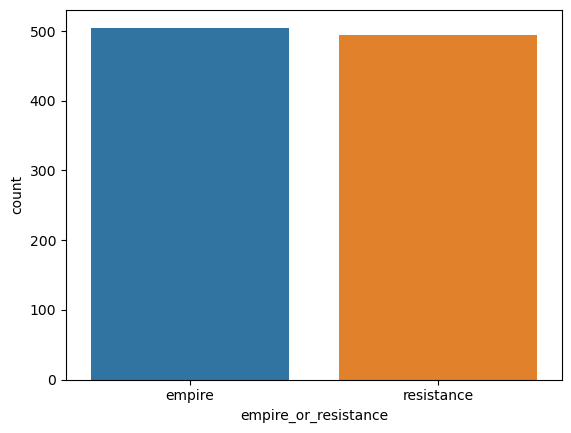

In [11]:
sns.barplot(data=faction_count_df, x='empire_or_resistance', y='count')